In [ ]:
import numpy as np
import cv2

def hide_secret_message(image, message):
    # Convert the image to a numpy array
    image_array = np.array(image)

    # Get the shape of the image
    shape = image_array.shape

    # Flatten the image array into a 1D array
    flatten_image = image_array.flatten()

    # Convert the secret message to binary
    binary_message = "".join([format(ord(x), '08b') for x in message])

    # Hide the binary message in the LSB of each pixel
    for i, x in enumerate(flatten_image):
        lsb = int(bin(x)[-1])
        if i < len(binary_message):
            new_lsb = int(binary_message[i])
            if lsb != new_lsb:
                flatten_image[i] -= lsb
                flatten_image[i] += new_lsb

    # Convert the 1D array back to the original shape
    stego_image = np.reshape(flatten_image, shape)

    return stego_image

# Load the image using OpenCV
image = cv2.imread("/content/reconstructed_image.png")

# The secret message to be hidden
message = "My bank account pin is 9988 use it if you wish to buy anything"

# Hide the secret message in the image
stego_image = hide_secret_message(image, message)

# Save the stego image
cv2.imwrite("stego_image.png", stego_image)


True

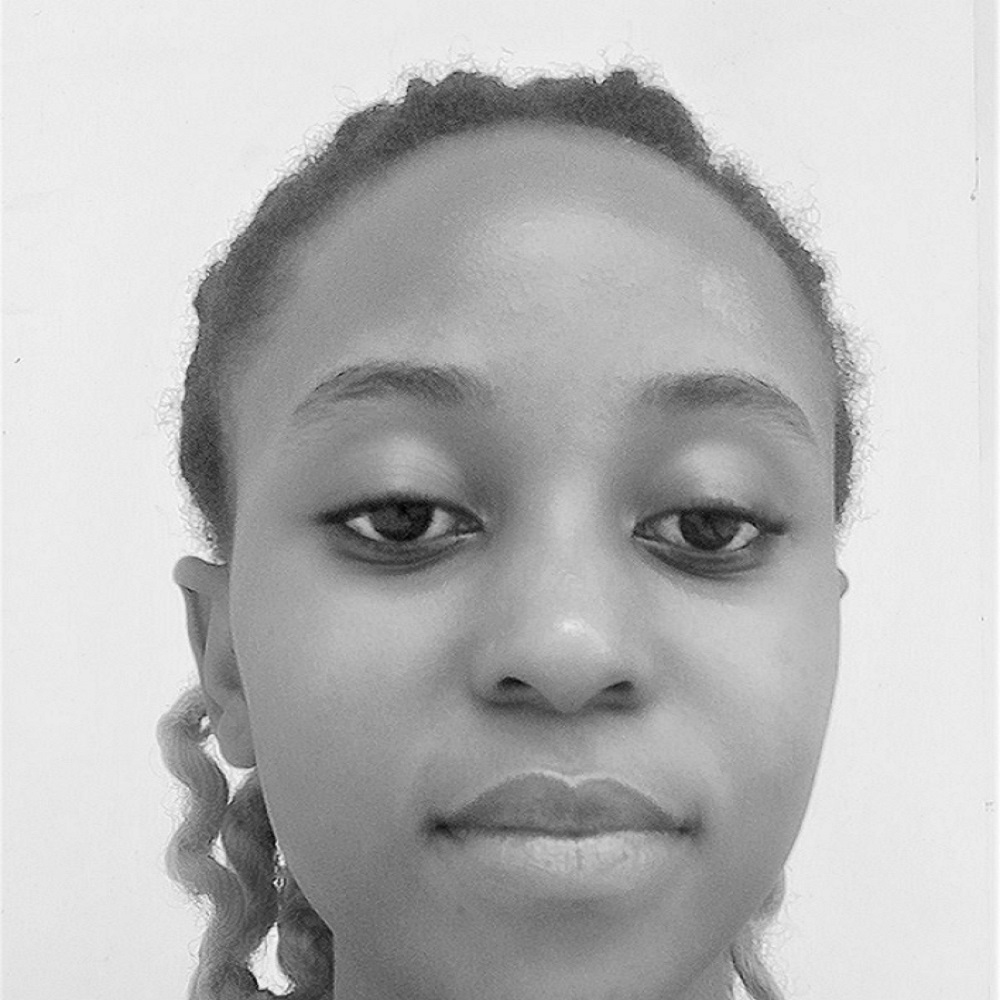

True

In [ ]:
import numpy as np
import cv2


# read an image
image = cv2.imread('/content/sample_data/fa.jpg', cv2.IMREAD_GRAYSCALE)
# create data to be embedded
data = [1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0]

rows, cols = image.shape
# divide image into blocks
block_size = 8
num_blocks_x = int(cols / block_size)
num_blocks_y = int(rows / block_size)
# function for LSB substitution
def lsb_substitution(image, data):
    blocks = [image[i:i+block_size, j:j+block_size] for i in range(0, rows, block_size)
              for j in range(0, cols, block_size)]
    # sort pixels of each block
    for i in range(len(blocks)):
        blocks[i] = np.sort(blocks[i].ravel()).reshape(block_size, block_size)
    # embed data into LSBs
    data_index = 0
    for i in range(len(blocks)):
        for j in range(block_size):
            for k in range(block_size):
                if data_index == len(data):
                    return blocks
                blocks[i][j][k] = (blocks[i][j][k] & ~1) | data[data_index]
                data_index += 1
    return blocks

cv2_imshow(image)
cv2.imwrite('lsb_substitution.png',image)


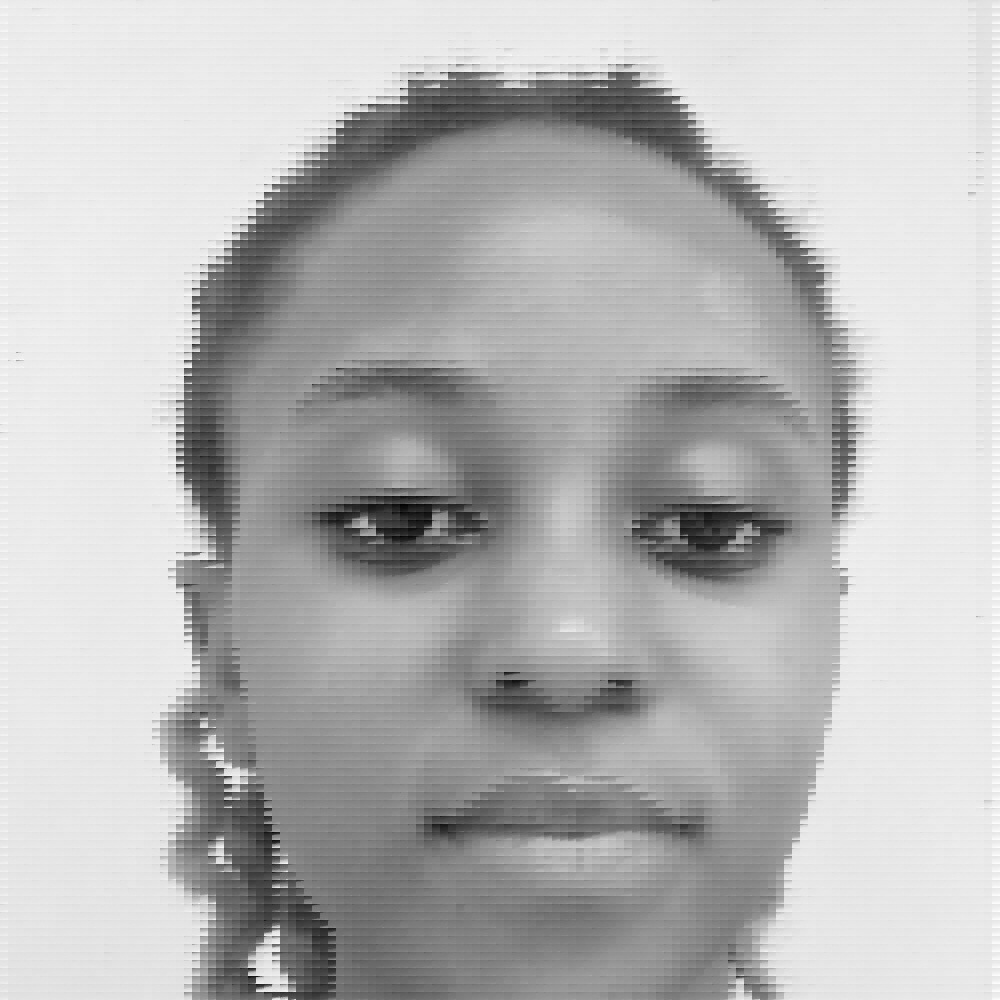

In [ ]:
# test the function
# perform LSB substitution
blocks = lsb_substitution(image, data)
# reconstruct the image from the blocks
# num_blocks = len(blocks)
# num_blocks_x = int(num_blocks / num_blocks_y)
reconstructed_image = np.concatenate([np.concatenate(blocks[i:i+num_blocks_x], axis=1) for i in range(0, len(blocks), num_blocks_x)])
# save the reconstructed image
cv2.imwrite('reconstructed_image.png', reconstructed_image)

# Display the reconstructed image
from google.colab.patches import cv2_imshow
cv2_imshow(reconstructed_image)

In [ ]:
import numpy as np
import cv2

def extract_secret_message(image):
    # Convert the image to a numpy array
    image_array = np.array(image)

    # Get the shape of the image
    shape = image_array.shape

    # Flatten the image array into a 1D array
    flatten_image = image_array.flatten()

    # Get the least significant bit of each pixel
    lsb = [int(bin(x)[-1]) for x in flatten_image]

    # Convert the binary data back to text
    secret_message = "".join([chr(int("".join(map(str, lsb[i:i+8])), 2)) for i in range(0, len(lsb), 8)])

    return secret_message

# Load the image using OpenCV
image = cv2.imread("/content/reconstructed_image.png")
#cv2_imshow(image)

# Extract the secret message
secret_message = extract_secret_message(image)

print("Secret Message:", secret_message)

Secret Message: ãð8ÿÿ  ?   à  ü  àÿ   à  ÿøà  à  ÿÿøü   øÿÿÿÀãñÀÿÿàÿà ? ÿÿÀÿÿøÿÿÿÿÿÿÿÿÿøÿÿÀÿÿÿàÿÿÿü  ÿð ÿþ ÿÿÿà  à            ÿÿ    ðÿ ÿ ÿ ÿÿÿ   ÿÿÿÿÿÀÿÿü    ÿ?   ÿÿà    ÿÿÿ ÿÿÿ  à  à   àøàøÿð       ü  ü  ãÿÀ Àÿÿÿÿð    ÿ ãÿøÿÿÿÿþ ÿÿ     ?ÿÿÿÿà  ãþ à   ÿÿþ ÿð à  ÿÿ ÿÿÿÿÿÿÿøãð ü ?à àÀÿÿüÀþ à ? ÿ à  à ?  ÿÿ   ÿÿÿ ÿ ÿÿøÿð þ ÿÀãÿÀÿÿàÀüp8ÿ ÿÿÿÿÿÿÿÿ ÿÿÿÿ ÿ ÿ   ÿÿ       ÿ  ? ÿ   ÿ à  à  ÿÿÿÿÿÀ         à  ÿ       ÿ ÿÿÿÿð    ÿÿ ÿÿÿÿ ÿ          ?ÿÿÿ   ÿÿÿà ?     ?ÿÿÿþ    ÿÿÿ   à     ÿÿÿÿÿÿ  ÿÿøÿÿÿÿÿà  ü  à  ÿÿÿ  ÿÿÿÿø        ?  ÿÿÿ ÿÿÿ ÿ      ÿÿÿÿÿÿÿ   ÿÿÿ   à     ÿÿÿÿð ü  ÿÿÿÿÿÿÿÿÿÿÿ   ÿÿÿ ÿÿÿÿÿÿøÿÿÿà        ÿÿÿÿÿøÿÿà   ÿ ÿÿÿÿ  ? ÿ  ÿÿÿÿÿÿÿð    ü  ÿÿÿÿ       ÿÿÿø   ÿ  Ç   ÿÿÿÿÿÿÿÿÿÿøÿÿÿÿÿÿÿÿøÿÿÿÿÿÿÿÿÿÿ   ÿÿÿÿÿÿÿð  ÿÿÿ      ÿÿÿ      ÿ  ?  ?                  ÿÿÿþ ÿÿÿÿÿÿÿÿÿÿÿÿÿÿ   ÿÿÿÿÿÀ ÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿ   ÿÿÿÿÿÿÿÿÿÿÿÿ ÿÿ ÿð ÿÿÿ   ÿ         ?   ÿÿÿÿÿÿÿÿÿ    ÿÿÿÿÿÿÿÿð ÿÿÿÿÿÿÿð ÿÿÿÿÿ   ÿÿÿ